<a href="https://colab.research.google.com/github/sara-velmont/analisis_red_Quimica/blob/main/Caracter%C3%ADsticas_Red_de_Qu%C3%ADmica%2C_Centralidades_y_Modularidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Librerías nececesarias
import numpy as np #operaciones matemáticas
import networkx as nx #Para manejo de redes
import matplotlib.pyplot as plt #Para gráficas y edición
import pandas as pd #para manejos de datos
from scipy.stats import poisson

#**Red Real**


In [3]:
datos = pd.read_csv('Enlaces de Red de Química 09-23.csv', header=None)

In [ ]:
data = pd.read_excel('Red de Química, nodos y nombres.xlsx')
Profesorado = dict(zip(data['Columna1'], data['Columna2']))

In [ ]:
Profesorado #Nodos y nombres correspondientes

{0: 'José Alfonso Arroyo Reyna',
 1: 'Andrés Hernández Arana',
 2: 'Alberta Jaqueline Padilla Zuñiga',
 3: 'Dolores Silvia Solís Mendiola',
 4: 'Salvador Ramón Tello Solís',
 5: 'Rafael Arturo Zubillaga Luna',
 6: 'Irais Vera Robles',
 7: 'Alejandro López Gaona',
 8: 'Gloria Alicia del Ángel Montes',
 9: 'Nancy Coromoto Martín Guaregua',
 10: 'Francisco Tzompantzi Morales',
 11: 'Ruth Patricia Villamil Aguilar',
 12: 'Margarita Viniegra Ramírez',
 13: 'Nikola Batina',
 14: 'Laura Galicia Luis',
 15: 'Ignacio González Martínez',
 16: 'Hugo Sánchez Soriano',
 17: 'Leonardo Salgado Juárez',
 18: 'Juan Marcos Esparza Schulz',
 19: 'Salomón Cordero Sánchez',
 20: 'José Andrés Cedillo Ortiz',
 21: 'Marcelo Enrique Galván Espinosa',
 22: 'Jorge Garza Olguín',
 23: 'José Luis Gázquez Mateos',
 24: 'Joel Ireta Moreno',
 25: 'Francisco Méndez Ruiz',
 26: 'Miguel Angel Morales Cortés',
 27: 'Rubicelia Vargas Fosada',
 28: 'José Luis Córdova Frunz',
 29: 'Annia Galano Jiménez',
 30: 'María Teresa 

In [4]:
#Creando la red de química
GR = nx.from_pandas_edgelist(datos, source= 0, target= 1)
for nodo in datos:  #Añadiendo el nodo 32 que no tiene enlaces
    GR.add_node(32)


In [5]:
A=nx.to_numpy_array(GR) #Matriz de adyacencia

In [6]:
#Número de enlaces
L=np.sum(A != 0)/2
L

135.0

In [7]:
#Centralidad de grado ordenada de mayor a menor
grado = nx.degree_centrality(GR)
lista_grado = [(N, D) for N, D in grado.items()]
lista_grado_ordenada = sorted(lista_grado, key=lambda x: x[1], reverse=True)
Grado_ordenado = {N: D for N, D in lista_grado_ordenada}
for N, D in Grado_ordenado.items():
    print(f'{N}: {D}')

15: 0.3953488372093023
27: 0.37209302325581395
12: 0.27906976744186046
21: 0.2558139534883721
4: 0.23255813953488372
5: 0.23255813953488372
30: 0.23255813953488372
2: 0.20930232558139533
43: 0.20930232558139533
22: 0.20930232558139533
1: 0.18604651162790697
39: 0.18604651162790697
38: 0.18604651162790697
31: 0.18604651162790697
0: 0.16279069767441862
9: 0.16279069767441862
11: 0.16279069767441862
18: 0.16279069767441862
13: 0.16279069767441862
23: 0.16279069767441862
3: 0.13953488372093023
28: 0.13953488372093023
20: 0.13953488372093023
6: 0.11627906976744186
10: 0.11627906976744186
7: 0.11627906976744186
14: 0.11627906976744186
29: 0.11627906976744186
25: 0.11627906976744186
24: 0.09302325581395349
17: 0.09302325581395349
42: 0.09302325581395349
41: 0.06976744186046512
8: 0.06976744186046512
26: 0.06976744186046512
33: 0.06976744186046512
40: 0.06976744186046512
34: 0.046511627906976744
37: 0.046511627906976744
16: 0.023255813953488372
19: 0.023255813953488372
35: 0.023255813953488372

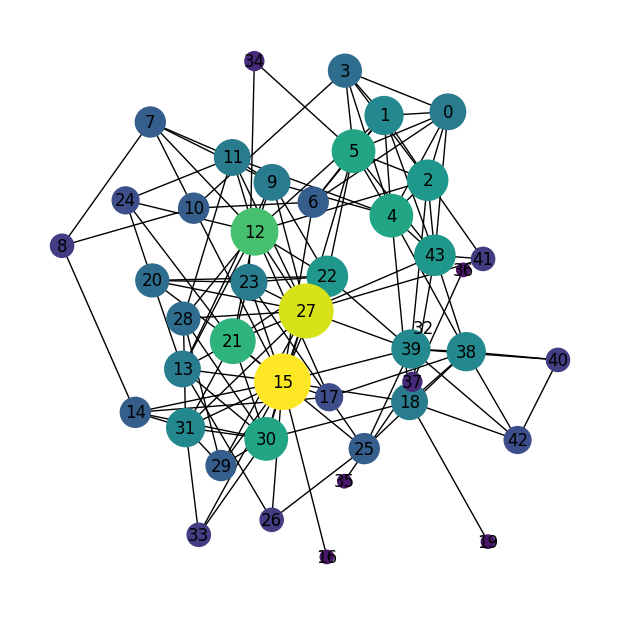

In [14]:
#Visualización de la Red por colores en Centralidad de grado
colors = np.array([grado[i] for i in GR])
sizes = np.array([grado[i] for i in GR])
plt.figure(figsize = [6,6] )

nx.draw_kamada_kawai(GR, with_labels = True,
        node_size = 4000*sizes,
        node_color = colors,
        cmap = 'viridis')


In [20]:
#Centralidad de intermediación
intermediación = nx.betweenness_centrality(GR)
lista_intermediación = [(N, D) for N, D in intermediación.items()]
lista_intermediación_ordenada = sorted(lista_intermediación, key=lambda x: x[1], reverse=True)
Intermediación_ordenado = {N: D for N, D in lista_intermediación_ordenada}
for N, D in Intermediación_ordenado.items():
    print(f'{N}: {D}')

15: 0.2062890529396039
27: 0.12259061986666475
18: 0.07024408770219834
12: 0.06692898426251018
39: 0.06192878734406974
4: 0.045953464078469404
5: 0.04092018063201076
21: 0.03906200876837968
38: 0.03611557207467259
30: 0.03360803257479724
10: 0.030958764567749115
23: 0.027992527959305364
43: 0.027512514194163597
2: 0.024560236553188435
22: 0.024551120695834393
6: 0.018852847897337276
11: 0.018369594126470185
14: 0.01774393613191822
13: 0.01603786452330521
9: 0.01541327857048685
7: 0.014697022500720316
17: 0.013160144624423964
25: 0.012953903485464947
31: 0.011723780176040755
1: 0.011167281305184797
3: 0.009016205679501938
28: 0.006291445401275379
20: 0.00514940639525357
8: 0.002760639139376681
0: 0.002715432875767991
26: 0.0025606883580305503
24: 0.0022010805731735965
42: 0.002122554448135843
34: 0.0013319798203519132
37: 0.0011074197120708748
29: 0.0011074197120708746
41: 0.0008117482369974062
16: 0.0
33: 0.0
19: 0.0
35: 0.0
36: 0.0
40: 0.0
32: 0.0


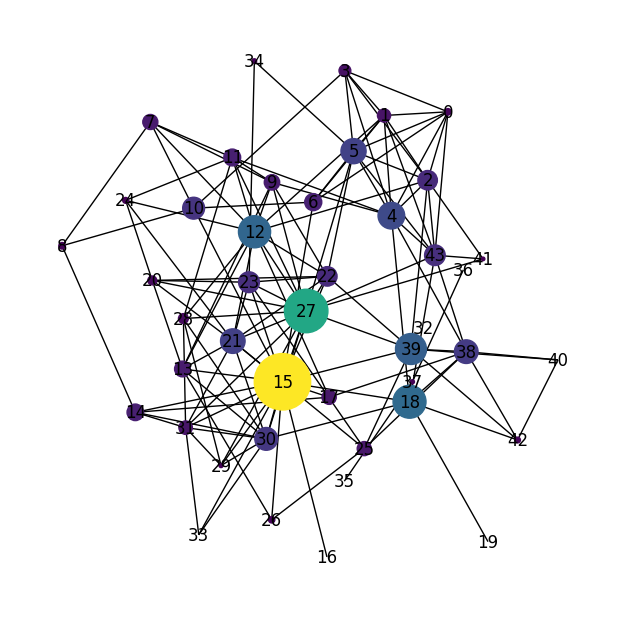

In [24]:
#Visualización de la Red por colores en Centralidad de intermediación
colors = np.array([intermediación[i] for i in GR])
sizes = np.array([intermediación[i] for i in GR])
plt.figure(figsize = [6,6] )

nx.draw_kamada_kawai(GR, with_labels = True,
        node_size = 8000*sizes,
        node_color = colors,
        cmap = 'viridis')

In [15]:
#Centralidad de cercanía
Cercania = nx.closeness_centrality(GR)
lista_Cercania = [(N, D) for N, D in Cercania.items()]
lista_Cercania_ordenada = sorted(lista_Cercania, key=lambda x: x[1], reverse=True)
Cercania_ordenado = {N: D for N, D in lista_Cercania_ordenada}
for N, D in Cercania_ordenado.items():
    print(f'{N}: {D}')

15: 0.5798703774304231
27: 0.5526889534883721
22: 0.49819849328529314
12: 0.4780012570710244
21: 0.4780012570710244
39: 0.47162790697674417
30: 0.47162790697674417
18: 0.45937783147085465
4: 0.45348837209302323
43: 0.44774801295260525
2: 0.44215116279069766
9: 0.44215116279069766
5: 0.4366925064599483
11: 0.4366925064599483
17: 0.4366925064599483
31: 0.4366925064599483
23: 0.4366925064599483
13: 0.4313669880884855
38: 0.4261697954609134
1: 0.4210963455149502
6: 0.4210963455149502
10: 0.4210963455149502
28: 0.4161422708618331
29: 0.4065757818765036
3: 0.3930232558139535
14: 0.3930232558139535
0: 0.388704318936877
25: 0.388704318936877
41: 0.384479271991911
20: 0.384479271991911
26: 0.384479271991911
33: 0.3684593023255814
7: 0.3646607528170702
24: 0.3646607528170702
16: 0.35729386892177584
42: 0.3434183788665613
34: 0.33687707641196013
40: 0.33369899078543214
8: 0.3215644820295983
19: 0.3075834175935288
37: 0.046511627906976744
35: 0.031007751937984496
36: 0.031007751937984496
32: 0.0


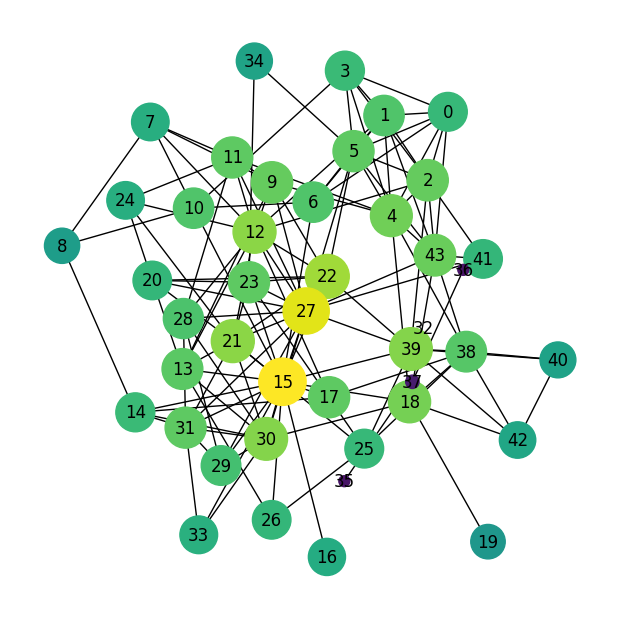

In [19]:
#Visualización de la Red por colores en Centralidad de Cercanía
colors = np.array([Cercania[i] for i in GR])
sizes = np.array([Cercania[i] for i in GR])
plt.figure(figsize = [6,6] )

nx.draw_kamada_kawai(GR, with_labels = True,
        node_size = 2000*sizes,
        node_color = colors,
        cmap = 'viridis')

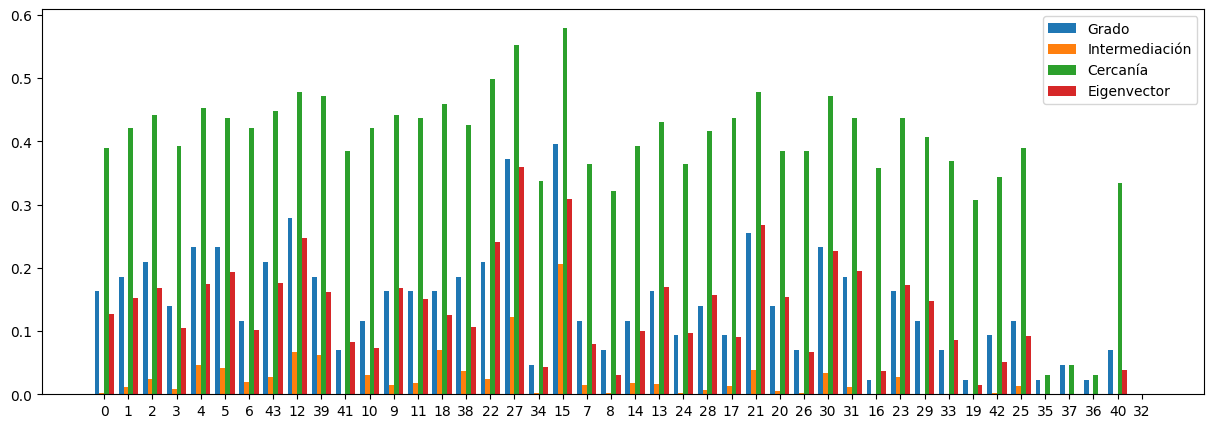

In [25]:
#Visualización de centralidades

eigenvector = nx.eigenvector_centrality(GR)
a = np.array([grado[i] for i in GR])
b = np.array([intermediación[i] for i in GR])
c = np.array([Cercania[i] for i in GR])
d = np.array([eigenvector[i] for i in GR])

indices = range(len(a))
ancho_barra = 0.2

plt.figure(figsize=[15, 5])

plt.bar(indices, a, width=ancho_barra, label='Grado', align='center')
plt.bar([i + ancho_barra for i in indices], b, width=ancho_barra, label='Intermediación', align='center')
plt.bar([i + 2 * ancho_barra for i in indices], c, width=ancho_barra, label='Cercanía', align='center')
plt.bar([i + 3 * ancho_barra for i in indices], d, width=ancho_barra, label='Eigenvector', align='center')

plt.xticks([i + 1.5 * ancho_barra for i in indices], grado.keys())

# Agregar una leyenda
plt.legend()


In [ ]:
#Estas son las comunidades que detecta el programa
#Está midiendo la modularidad para clasificar a las comunidades
from networkx.algorithms.community import greedy_modularity_communities
comunidades = greedy_modularity_communities(GR)
comunidades

[frozenset({13, 14, 15, 16, 17, 21, 26, 27, 28, 29, 30, 31, 33}),
 frozenset({7, 8, 9, 10, 11, 12, 20, 22, 23, 24, 34}),
 frozenset({0, 1, 2, 3, 4, 5, 6, 41, 43}),
 frozenset({18, 19, 25, 38, 39, 40, 42}),
 frozenset({35, 36, 37}),
 frozenset({32})]

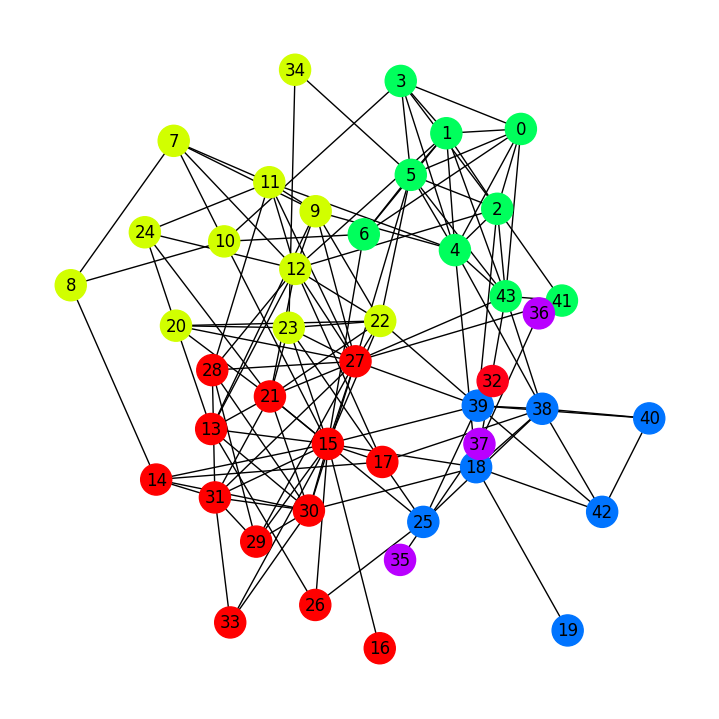

In [ ]:
Com = {}

for i, comunidad in enumerate(comunidades):
  for nodo in comunidad:
    Com[nodo] = i

#Asigando un color a cada comunidad detectada
colors = np.array([Com[i] for i in GR ])
plt.figure(figsize = [7,7])

nx.draw_kamada_kawai(GR, with_labels = True, node_color = colors, node_size = 500,
                     cmap = 'hsv')

In [ ]:
componentes = list(nx.connected_components(GR))
diametros_componentes = []
for componente in componentes:
    subgrafo = GR.subgraph(componente)
    diametro = nx.diameter(subgrafo)
    diametros_componentes.append(diametro)

diametro_maximo = max(diametros_componentes)
subgrafo

##Características Generales

In [ ]:
#Medidas globales:
N = nx.number_of_nodes(GR)
#La red tiene componentes, algunos grupos de nodos no están conectados
componentes = list(nx.connected_components(GR))
diametros_componentes = []
for componente in componentes:
    subgrafo = GR.subgraph(componente)
    diametro = nx.diameter(subgrafo)
    diametros_componentes.append(diametro)

componente_mas_grande = max(componentes, key=len)
G2 = GR.subgraph(componente_mas_grande)

print("El grado promedio de la red es %.3f" %(2*nx.number_of_edges(GR)/N))
print("El coeficiente de agrupamiento promedio de la red es %.3f" %nx.average_clustering(GR))
print("La distancia promedio de la componente más grande es %.3f" %nx.average_shortest_path_length(G2))
print('Distancia máxima entre nodos (diámetro): \t', np.max(G2))
print("El diámetro de la componente más grande es %.3f" %max( diametros_componentes))
print("La modularidad es es %.3f" %nx.algorithms.community.modularity(GR, comunidades))

El grado promedio de la red es 6.136
El coeficiente de agrupamiento promedio de la red es 0.387
La distancia promedio de la componente más grande es 2.210
Distancia máxima entre nodos (diámetro): 	 43
El diámetro de la componente más grande es 4.000
La modularidad es es 0.384


In [ ]:
#Distribución de grado
Degree = dict(GR.degree)
grados = [Degree[i] for i in GR]
distribucion = {}
for i in grados: #este bucle únicamente genera las claves del diccionario, asignándoles un valor de 0
  distribucion[i] = 0
for i in grados: #este bucle recorre todos los grados y cada vez que un valor aparece, suma uno a la cuenta de ese valor
  distribucion[i] += 1


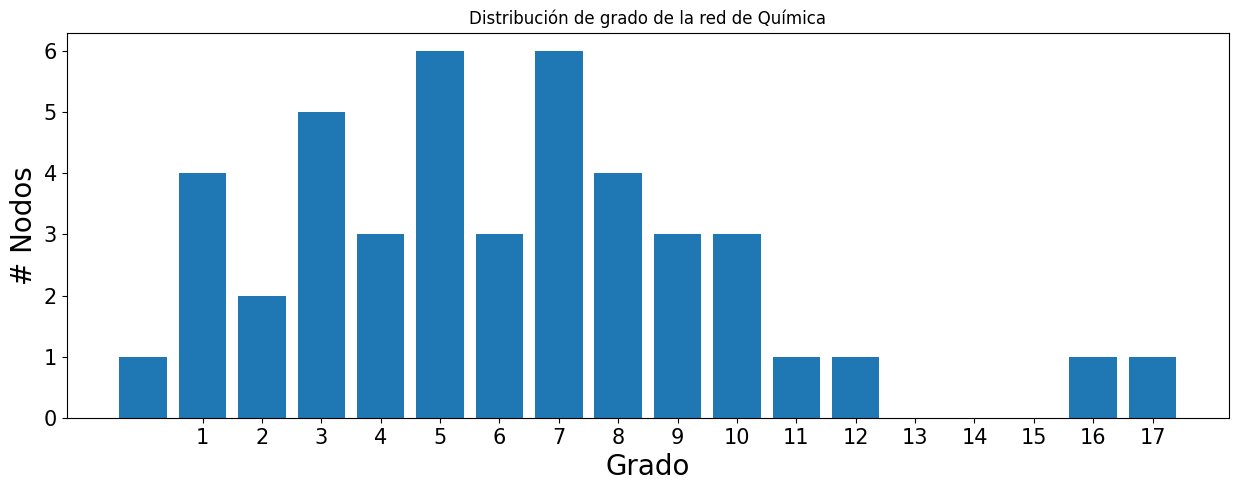

In [ ]:
#Visualización del histograma
X = distribucion.keys()
Y = distribucion.values()

plt.figure(figsize = [15, 5])

plt.bar(X,Y)

plt.xlabel('Grado', size = 20)
plt.ylabel('# Nodos', size = 20)
plt.xticks(ticks = range(1,max(X)+1),labels = range(1,max(X)+1), size = 15)
plt.yticks(size = 15)
plt.title('Distribución de grado de la red de Química')
plt.show()

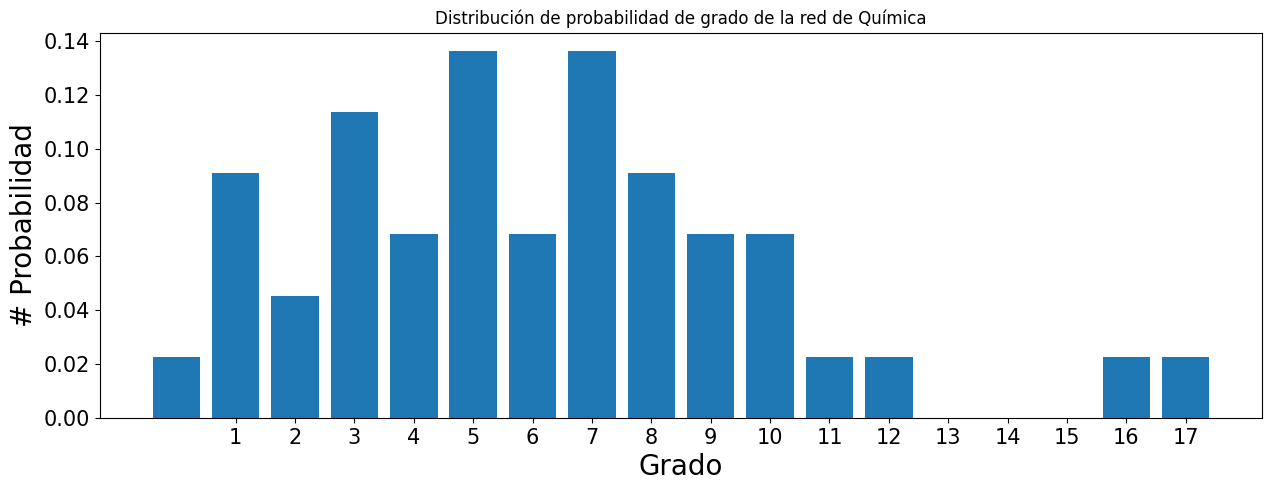

In [ ]:
#Distribución de probabilidad de grado

distribucion_probabilidad = {k: v / 44 for k, v in distribucion.items()}

X = distribucion_probabilidad.keys()
Y = distribucion_probabilidad.values()

plt.figure(figsize = [15, 5])

plt.bar(X,Y)

plt.xlabel('Grado', size = 20)
plt.ylabel('# Probabilidad', size = 20)
plt.xticks(ticks = range(1,max(X)+1),labels = range(1,max(X)+1), size = 15)
plt.yticks(size = 15)
plt.title('Distribución de probabilidad de grado de la red de Química')
plt.show()